In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
iris = pd.read_excel("Iris.xls")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Cho pentalwidth dự đoán pentallength
petalwidth = iris[['petalwidth']] # x hay input
pentallength = iris['petallength'] # y hay output

In [4]:
pentallength[:5]

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petallength, dtype: float64

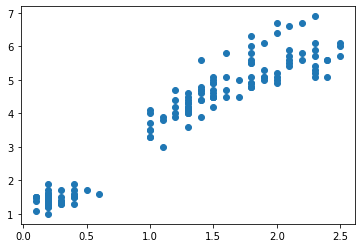

In [5]:
plt.scatter(petalwidth, pentallength)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(petalwidth,pentallength,test_size=0.20,random_state = 42)

In [9]:
# neu nhu co mot so k co score = nhau => tim mse cua cac k bang nhau =>
# mse << => chon k
list_k = []
list_r_score = []
for K_value in range(2,int(y_train.shape[0]**0.5)):
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test,y_test)*100
    list_r_score.append(score)
    print("The R^2 score is ", score, " for K-Value:",K_value)
vi_tri = list_r_score.index(max(list_r_score))
k = list_k[vi_tri]
print("\nThe optimal number of neighbors is:", k, "with R^2 score is:",
list_r_score[vi_tri])

The R^2 score is  92.61607309341787  for K-Value: 2
The R^2 score is  94.03093022335983  for K-Value: 3
The R^2 score is  94.27262556574509  for K-Value: 4
The R^2 score is  94.6437034902446  for K-Value: 5
The R^2 score is  94.99968922866555  for K-Value: 6
The R^2 score is  94.84781487391967  for K-Value: 7
The R^2 score is  94.8173935890699  for K-Value: 8
The R^2 score is  94.85852370431897  for K-Value: 9

The optimal number of neighbors is: 6 with R^2 score is: 94.99968922866555


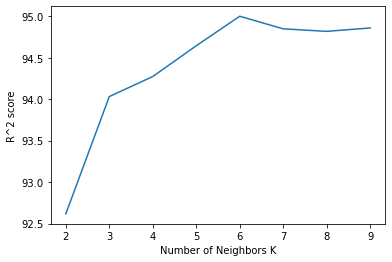

In [10]:
plt.plot(list_k, list_r_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('R^2 score')
plt.show()

In [11]:
# seleck k => model
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [12]:
y_pred = knn.predict(X_test)
y_pred

array([3.9       , 1.36666667, 5.71666667, 4.63333333, 4.6       ,
       1.6       , 4.16666667, 5.71666667, 4.63333333, 3.9       ,
       5.53333333, 1.4       , 1.38333333, 1.4       , 1.36666667,
       4.85      , 5.85      , 3.91666667, 4.16666667, 5.85      ,
       1.38333333, 5.36666667, 1.6       , 5.66666667, 5.53333333,
       5.71666667, 5.36666667, 5.71666667, 1.36666667, 1.38333333])

In [13]:
print("The Training R^2 score is: ", knn.score(X_train,y_train))
print("The Testing R^2 score is: ", knn.score(X_test,y_test))

The Training R^2 score is:  0.9581011061128362
The Testing R^2 score is:  0.9499968922866554


In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.16387962962962974


In [17]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values,
'Prediction': pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,4.7,3.900000
1,1.7,1.366667
2,6.9,5.716667
3,4.5,4.633333
4,4.8,4.600000


In [18]:
x_now = [[0.25]]
y_now = knn.predict(x_now)
y_now

array([1.38333333])